In [1]:

import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd

# Read in the CSV file
file = pd.read_csv("c51e.csv")

# Select the first column named "time"
selected_column = file['time']

# Convert the column to datetime type with the appropriate format
selected_column = pd.to_datetime(selected_column, format="%d/%m/%Y %H:%M")

# Filter the data based on the time between 09:00 and 20:00
filtered_data = file[
    selected_column.dt.strftime("%H:%M").between('09:00', '20:00')
]

# Print the filtered data
print(filtered_data)

                  time  eui-e8e1e1000104c51e
17    01/06/2023 09:00                  50.2
18    01/06/2023 09:30                  50.3
19    01/06/2023 10:00                  49.8
20    01/06/2023 10:30                  51.7
21    01/06/2023 11:00                  50.8
...                ...                   ...
1518  02/07/2023 18:00                  50.4
1519  02/07/2023 18:30                  49.5
1520  02/07/2023 19:00                  50.6
1521  02/07/2023 19:30                  49.0
1522  02/07/2023 20:00                  51.8

[731 rows x 2 columns]


In [3]:
import numpy as np

# Create a copy of filtered_data_clean
filtered_data_clean = filtered_data.copy()

# Subtract 1 from the values in the second column, excluding the rows where the value is 255
filtered_data_clean.loc[filtered_data_clean.iloc[:, 1] != 255, filtered_data_clean.columns[1]] += 6

# Print the updated filtered_data_clean DataFrame
print(filtered_data_clean)
# Delete rows with null values in the second column
filtered_data_clean = filtered_data.dropna(subset=[filtered_data.columns[1]])

# Delete rows with values between 101 and 254 or less than 40 and greater than 0 in the second column
filtered_data_clean = filtered_data_clean[~filtered_data_clean.iloc[:, 1].between(101, 254) &
                                          ~filtered_data_clean.iloc[:, 1].between(0, 39)]

# Print the updated filtered data
print(filtered_data_clean)

                  time  eui-e8e1e1000104c51e
17    01/06/2023 09:00                  56.2
18    01/06/2023 09:30                  56.3
19    01/06/2023 10:00                  55.8
20    01/06/2023 10:30                  57.7
21    01/06/2023 11:00                  56.8
...                ...                   ...
1518  02/07/2023 18:00                  56.4
1519  02/07/2023 18:30                  55.5
1520  02/07/2023 19:00                  56.6
1521  02/07/2023 19:30                  55.0
1522  02/07/2023 20:00                  57.8

[731 rows x 2 columns]
                  time  eui-e8e1e1000104c51e
17    01/06/2023 09:00                  50.2
18    01/06/2023 09:30                  50.3
19    01/06/2023 10:00                  49.8
20    01/06/2023 10:30                  51.7
21    01/06/2023 11:00                  50.8
...                ...                   ...
1518  02/07/2023 18:00                  50.4
1519  02/07/2023 18:30                  49.5
1520  02/07/2023 19:00         

In [4]:
# Create a copy of filtered_data_clean
filtered_data_modified = filtered_data_clean.copy()

# Conditionally modify the values in the second column
mask = (filtered_data_modified.iloc[:, 1] == 255)
filtered_data_modified.loc[mask, filtered_data_modified.columns[1]] = 39

# Print the modified filtered_data_modified DataFrame
print(filtered_data_modified)

                  time  eui-e8e1e1000104c51e
17    01/06/2023 09:00                  50.2
18    01/06/2023 09:30                  50.3
19    01/06/2023 10:00                  49.8
20    01/06/2023 10:30                  51.7
21    01/06/2023 11:00                  50.8
...                ...                   ...
1518  02/07/2023 18:00                  50.4
1519  02/07/2023 18:30                  49.5
1520  02/07/2023 19:00                  50.6
1521  02/07/2023 19:30                  49.0
1522  02/07/2023 20:00                  51.8

[729 rows x 2 columns]


In [5]:
# Export the modified filtered_data_modified DataFrame to a CSV file
filtered_data_modified.to_csv("c51e_modified_data.csv", index=False)

In [6]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('c51e_modified_data.csv')

# Convert the 'time' column to datetime type
data['time'] = pd.to_datetime(data['time'], dayfirst=True, errors='coerce')

# Filter out the rows with date '06/03/2023' and time not between 11:00 and 18:00
filtered_data_sat = data.loc[
    ~(data['time'].dt.date == pd.to_datetime('06/03/2023', format='%m/%d/%Y').date())
    | data['time'].dt.strftime('%H:%M').between('11:00', '18:00')
]

# Print the updated filtered data
print(filtered_data_sat)


                   time  eui-e8e1e1000104c51e
0   2023-06-01 09:00:00                  50.2
1   2023-06-01 09:30:00                  50.3
2   2023-06-01 10:00:00                  49.8
3   2023-06-01 10:30:00                  51.7
4   2023-06-01 11:00:00                  50.8
..                  ...                   ...
724 2023-07-02 18:00:00                  50.4
725 2023-07-02 18:30:00                  49.5
726 2023-07-02 19:00:00                  50.6
727 2023-07-02 19:30:00                  49.0
728 2023-07-02 20:00:00                  51.8

[721 rows x 2 columns]


In [7]:
# Save the filtered data to a new CSV file
filtered_data_sat.to_csv('filtered_c51e_modified_data.csv', index=False)

In [8]:
import pandas as pd

# Read the filtered data from the CSV file
filtered_data = pd.read_csv('filtered_c51e_modified_data.csv')

# Find the maximum and minimum values of the second column
max_value = filtered_data.iloc[:, 1].max()
min_value = filtered_data.iloc[:, 1].min()

# Print the maximum and minimum values
print("Maximum value of the noise:", max_value)
print("Minimum value of the noise:", min_value)

Maximum value of the noise: 55.2
Minimum value of the noise: 41.3


In [9]:
# Calculate the average of the second column
average_value = filtered_data.iloc[:, 1].mean()

# Print the average value
print("Average value of the noise:", average_value)

Average value of the noise: 50.48224687933431


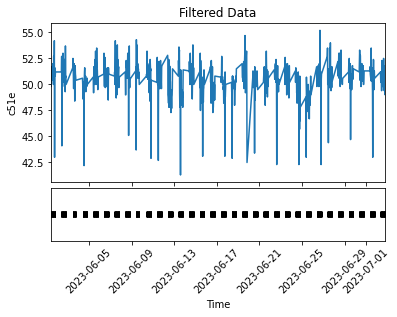

In [10]:
import matplotlib.pyplot as plt

# Convert the second column to numeric type if needed
filtered_data['time'] = pd.to_datetime(filtered_data['time'], dayfirst=True, errors='coerce')
filtered_data['eui-e8e1e1000104c51e'] = pd.to_numeric(filtered_data['eui-e8e1e1000104c51e'], errors='coerce')

# Create a Figure with two subplots
fig, (ax_data, ax_time) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot the data in the top subplot
ax_data.plot(filtered_data['time'], filtered_data['eui-e8e1e1000104c51e'])
ax_data.set_ylabel('c51e')
ax_data.set_title('Filtered Data')

# Set the limits of the x-axis in the data subplot
ax_data.set_xlim(filtered_data['time'].min(), filtered_data['time'].max())

# Plot the time axis in the bottom subplot
ax_time.plot(filtered_data['time'], [0] * len(filtered_data), '|', color='k')
ax_time.yaxis.tick_right()
ax_time.set_yticks([])
ax_time.set_xlabel('Time')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.05)

# Display the plot
plt.show()